Análise de Dados Campeonato Brasileiro de Futebol

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
database = 'https://raw.githubusercontent.com/GustavoCastillo1997/brazilian_soccer_championship/refs/heads/main/mundo_transfermarkt_competicoes_brasileirao_serie_a.csv'
df_campeonatos = pd.read_csv(database, sep=",")

In [137]:
# Total de Cobranças com Bola Parada por Time Mandante

cobrancas_por_time = df_campeonatos.groupby(['time_mandante'])['chutes_bola_parada_mandante'].sum()
cobrancas_por_time = cobrancas_por_time.reset_index()
cobrancas_por_time = cobrancas_por_time.fillna(0)
cobrancas_por_time['chutes_bola_parada_mandante'] = cobrancas_por_time['chutes_bola_parada_mandante'].astype(int)
cobrancas_por_time = cobrancas_por_time.rename(columns={'time_mandante':'Time Mandante', 'chutes_bola_parada_mandante':'Chutes com Bola Parada'})

print(cobrancas_por_time)

     Time Mandante  Chutes com Bola Parada
0       América-MG                     828
1       América-RN                       0
2     Athletico-PR                    1070
3      Atlético-GO                     830
4      Atlético-MG                    1308
5      Atlético-PR                     178
6          Avaí FC                     408
7          Barueri                       0
8         Botafogo                    1248
9   Brasiliense-DF                       0
10             CSA                      92
11        Ceará SC                    1030
12     Chapecoense                     561
13     Corinthians                    1392
14     Coritiba FC                     788
15     Criciúma EC                      97
16        Cruzeiro                     593
17       Cuiabá-MT                     894
18        EC Bahia                    1137
19      EC Vitória                     335
20  Figueirense FC                       0
21        Flamengo                    1473
22      Flu

In [136]:
# Número de Participações em Partidas Por Árbitro

partidas_por_arbitro = df_campeonatos[df_campeonatos['arbitro'] != 0]['arbitro'].value_counts()
partidas_por_arbitro = partidas_por_arbitro.reset_index()
partidas_por_arbitro = partidas_por_arbitro.rename(columns={'arbitro':'Árbitro', 'count':'Partidas Arbitradas'})

print(partidas_por_arbitro)

                    Árbitro  Partidas Arbitradas
0      Leandro Pedro Vuaden                  284
1            Wilton Sampaio                  253
2          Anderson Daronco                  224
3               Héber Lopes                  221
4             Raphael Claus                  212
..                      ...                  ...
204   Felipe Duarte Varejão                    1
205          Zandick Gondim                    1
206          Adriano Barros                    1
207  Renán Roberto de Souza                    1
208       Phillippe Lombard                    1

[209 rows x 2 columns]


<ipython-input-135-cf780f49302b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Árbitro', y='Partidas Arbitradas', data=partidas_por_arbitro, order=partidas_por_arbitro.sort_values('Partidas Arbitradas', ascending=False).head(10)['Árbitro'], palette='viridis')


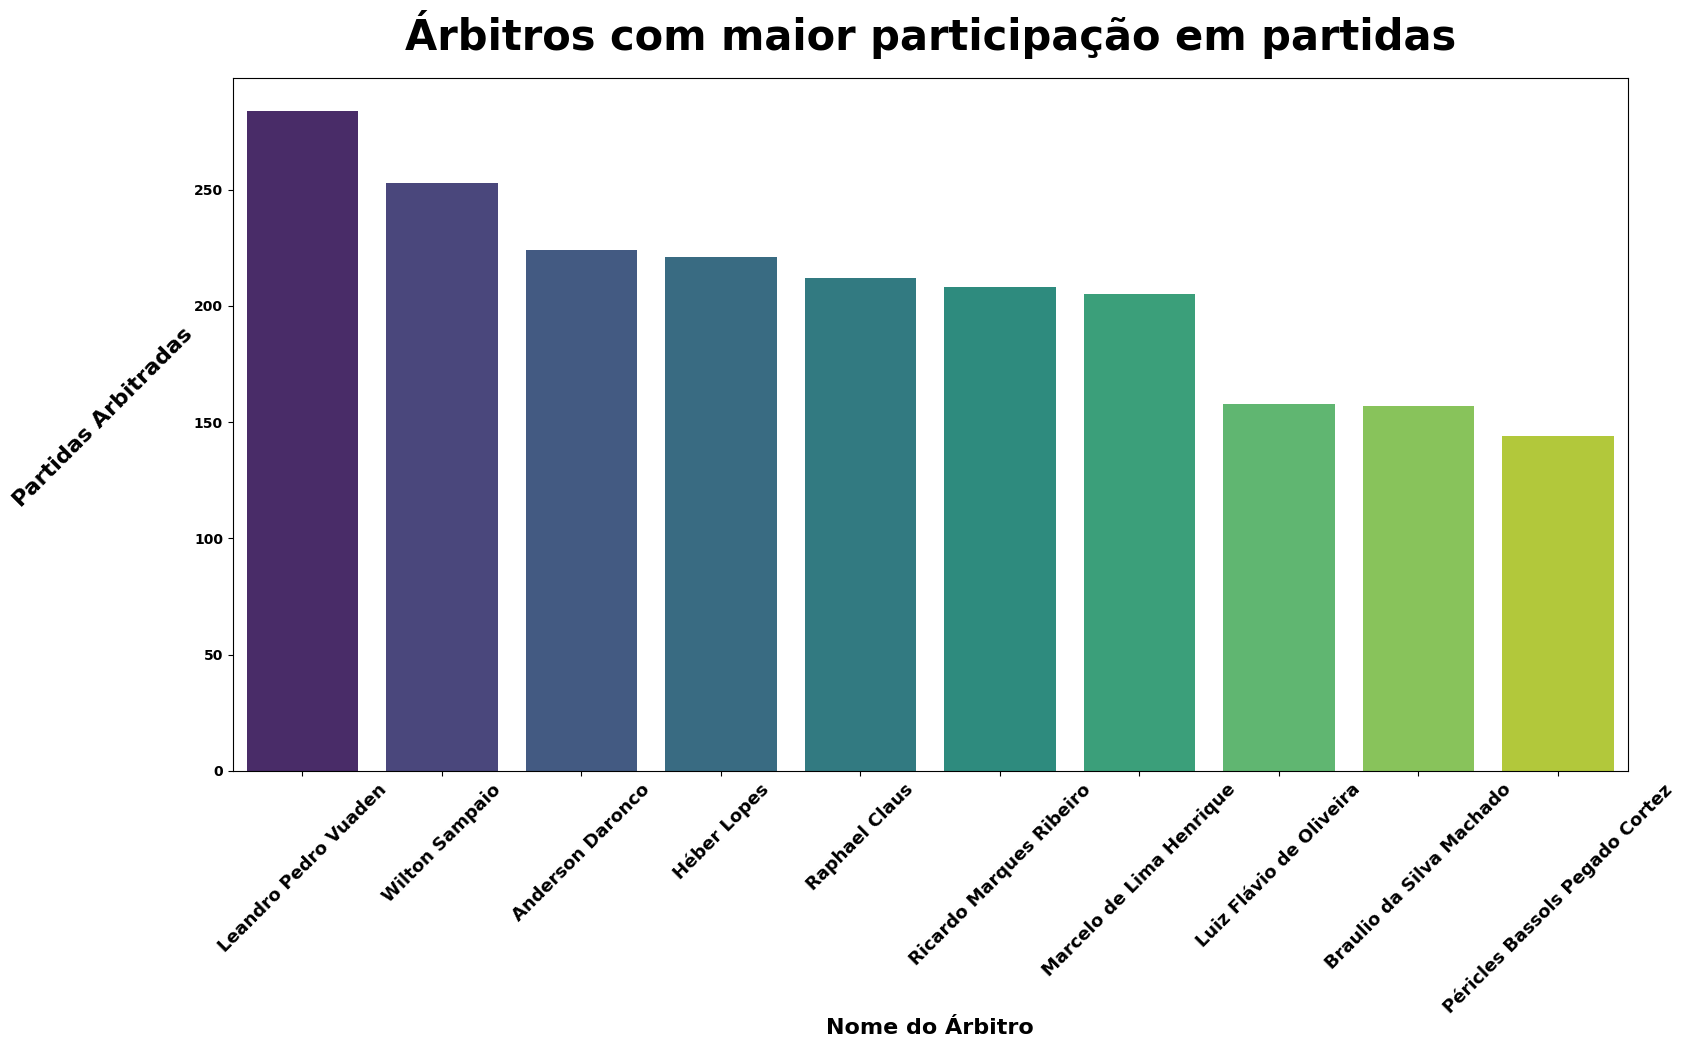

In [135]:
# Número de Participações em Partidas Por Árbitro - GRÁFICO DE BARRAS

plt.figure(figsize=(18, 9))
sns.barplot(x='Árbitro', y='Partidas Arbitradas', data=partidas_por_arbitro, order=partidas_por_arbitro.sort_values('Partidas Arbitradas', ascending=False).head(10)['Árbitro'], palette='viridis')

plt.xticks(rotation=45)
plt.xticks(fontweight='bold', fontsize=13)
plt.yticks(fontweight='bold')

plt.title('Árbitros com maior participação em partidas', fontweight='bold', fontsize=30, pad=20, color='black')
plt.xlabel('Nome do Árbitro', fontweight='bold', fontsize=16, labelpad=1, color='black')
plt.ylabel('Partidas Arbitradas', fontweight='bold', fontsize=16, rotation=45, labelpad=60, color='black')

plt.show()

In [134]:
# Maior Número de Gols Sofridos por um Mandante em uma Partida

time_estadio = df_campeonatos.loc[df_campeonatos.groupby(['estadio'])['gols_visitante'].idxmax()]
time_estadio = time_estadio[time_estadio['estadio'] != 0]
time_estadio = time_estadio[time_estadio['gols_visitante'] != 0]
time_estadio = time_estadio.fillna(0)
time_estadio['gols_visitante'] = time_estadio['gols_visitante'].astype(int)
time_estadio = time_estadio[['time_mandante', 'time_visitante', 'estadio', 'gols_visitante', 'data']]
time_estadio = time_estadio.rename(columns={'time_mandante':'Time Mandante', 'time_visitante':'Time Visitante', 'estadio':'Estádio', 'gols_visitante':'Gols do Visitante', 'data':'Data'})

print(time_estadio)

       Time Mandante Time Visitante                          Estádio  \
5178       Palmeiras  RB Bragantino                   Allianz Parque   
2287  Figueirense FC       EC Bahia                    Arena Barueri   
8075     Chapecoense         Grêmio                      Arena Condá   
892         EC Bahia      Santos FC                 Arena Fonte Nova   
1540    Joinville-SC    Atlético-PR                  Arena Joinville   
...              ...            ...                              ...   
2825     Atlético-PR       Cruzeiro  Estádio Érton Coelho de Queiroz   
2905    Athletico-PR       EC Bahia                      Ligga Arena   
3067       São Paulo  Internacional                         MorumBIS   
130      Corinthians      São Paulo                Neo Química Arena   
3890     Corinthians       EC Bahia               Neo Química Arena    

      Gols do Visitante        Data  
5178                  4  2021-10-10  
2287                  2  2014-04-27  
8075                 

In [133]:
# Times que Nunca sofreram Gols como Mandante

mandantes_intactos = df_campeonatos.loc[df_campeonatos.groupby(['estadio'])['gols_visitante'].idxmax()]
mandantes_intactos = mandantes_intactos[mandantes_intactos['gols_visitante'] == 0]
mandantes_intactos = mandantes_intactos[['time_mandante', 'estadio']]
mandantes_intactos = mandantes_intactos.rename(columns={'time_mandante':'Time Mandante', 'estadio':'Estádio'})

print(mandantes_intactos)

     Time Mandante                                 Estádio
1321      Flamengo                         Arena das Dunas
487      Palmeiras        Estádio Doutor Adhemar de Barros
2843    Portuguesa  Estádio Universitário Pedro Pedrossian
2503   Corinthians                     Estádio Vail Chaves
7721     São Paulo                               Pinheirão
